In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras import layers, models 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# pip install opencv-python

In [16]:
# Load and preprocess the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
len(train_images), len(train_labels)

(60000, 60000)

In [18]:
len(test_images), len(test_labels)

(10000, 10000)

In [19]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [20]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
train_images[0].shape

(28, 28)

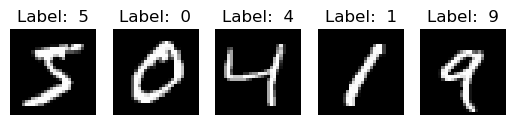

In [22]:
# Display same sample train images

num_samples_to_display = 5

for i in range(num_samples_to_display):
    # Row and columns + index of the plot    
    plt.subplot(1, num_samples_to_display, i + 1)

    # Show image in gray image
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label:  {train_labels[i]}")
    plt.axis("off")
    
plt.show()

In [18]:
# def show_images(num_samples_to_display, images, labels):
#     for i in range(num_samples_to_display):    
#         plt.subplot(1, num_samples_to_display, i + 1)
#         plt.imshow(train_images[i], cmap="gray")
#         plt.title(f"Label:  {train_labels[i]}") 
#         plt.axis("off")

#     plt.show()
# show_images(5, train_images[:5], train_labels[:5])

In [23]:
def show_imagess(images, labels):
    i = 1
    for img, lab in zip(images, labels):
        plt.subplot(1, len(labels), i)
        plt.imshow(img, cmap="gray")
        plt.title(f"Label: {lab}") 
        plt.axis("off")
        i = i + 1
    plt.show()

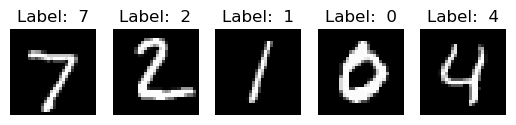

In [24]:
# Display same sample train images

num_samples_to_display = 5

for i in range(num_samples_to_display):
    # Row and columns + index of the plot    
    plt.subplot(1, num_samples_to_display, i + 1)

    # Show image in gray image
    plt.imshow(test_images[i], cmap="gray")
    plt.title(f"Label:  {test_labels[i]}")
    plt.axis("off")
    
plt.show()

In [25]:
# Scaling images, i.e converting color images to gray scale images 

train_images = train_images / 255
test_images = test_images / 255

In [26]:
# Convert 2D into 1D
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [27]:
train_images[:3]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [28]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
# Build the cnn model
model = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# relu is number of neurons
# Softmax is output layer

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


750/750 [==============================] - 45s 57ms/step - loss: 0.3142 - accuracy: 0.9010 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.0813 - val_accuracy: 0.9744
Epoch 3/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 4/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0628 - val_accuracy: 0.9811
Epoch 5/10
750/750 [==============================] - 42s 56ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0572 - val_accuracy: 0.9834
Epoch 6/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0559 - val_accuracy: 0.9823
Epoch 7/10
750/750 [==============================] - 44s 59ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0611 - val_accurac

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = loaded_model.evaluate(train_images, train_labels)
print(f"Test accuracy: {test_acc}")


1875/1875 [==============================] - 18s 9ms/step - loss: 0.0296 - accuracy: 0.9912
Test accuracy: 0.9911666512489319


In [43]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0614 - accuracy: 0.9838


[0.06138474866747856, 0.9837999939918518]

In [44]:
# Save the trained model
model.save("digit_recognition_model.h5")

E:\Anaconda_DS\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
y_predict = loaded_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [1]:
from tensorflow.keras.models import load_model
loaded_model = load_model("digit_recognition_model.h5")

In [2]:
import cv2
image = cv2.imread("./handwriting/0/Zero_full (1919).jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
image_resized = cv2.resize(image, (28, 28))
image_resized = image_resized / 255.0
image_reshaped = image_resized.reshape(1, 28, 28, 1)

In [4]:
value = loaded_model.predict(image_reshaped)

1/1 [==============================] - 1s 605ms/step


In [5]:
value

array([[1.4394486e-03, 7.4076857e-03, 9.4982731e-01, 1.6080858e-03,
        1.0372548e-02, 1.5908707e-04, 7.1212964e-04, 4.1203640e-04,
        2.8049596e-02, 1.2186087e-05]], dtype=float32)

In [6]:
import numpy as np

predicted_class = np.argmax(value)
predicted_class

2

In [29]:
lst = []
for i, prediction in enumerate(y_predict):
    predicted_class = np.argmax(prediction)
    lst.append(predicted_class)

NameError: name 'y_predict' is not defined

In [30]:
np.array(lst)

array([], dtype=float64)

In [31]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
accuracy = np.mean(lst == test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.0


C:\Users\shiva\AppData\Local\Temp\ipykernel_18940\578481403.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(lst == test_labels)


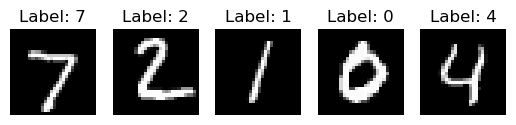

In [33]:
show_imagess(test_images[:5], test_labels[:5])

In [34]:
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))
    image = image / 255.0
    image = np.reshape(image, (1, 28, 28, 1))
    return image

In [35]:
def predict_image(model, image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions)
    return predicted_class

In [36]:
x = predict_image(loaded_model, "./handwriting/0/Zero_full (1919).jpg")

1/1 [==============================] - 0s 217ms/step


In [37]:
x

2

In [38]:
def show_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

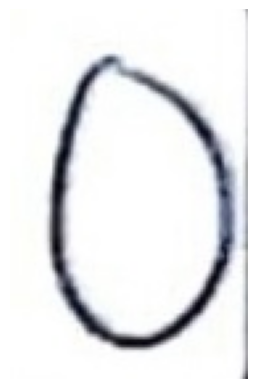

In [39]:
show_image("./handwriting/0/Zero_full (13).jpg")

In [40]:
show_image("./test.png")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [41]:
x = predict_image(loaded_model, "./test.png")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [43]:
x

2

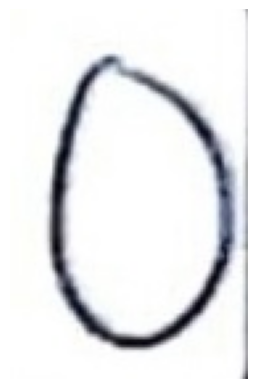

In [42]:
show_image("./handwriting/0/Zero_full (13).jpg")

In [44]:
x = predict_image(loaded_model, "./handwriting/0/Zero_full (13).jpg")

1/1 [==============================] - 0s 61ms/step


In [45]:
x

6

In [46]:
x = predict_image(loaded_model, "./test2.jpg")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [47]:
image_path = "./Test_Images_Project1/test2.png"

In [48]:
x

6

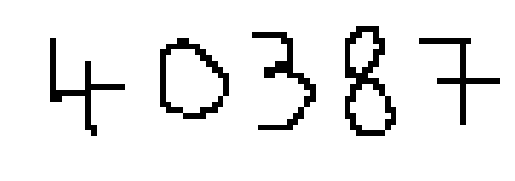

In [49]:
show_image("./Test_Images_Project1/test2.png")

In [50]:
# Function to display the image with bounding boxes around digits
def show_image_with_boxes(image_path, boxes):
    img = cv2.imread(image_path)
    
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [51]:
# Load the image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [52]:
# Apply thresholding or other pre-processing techniques to highlight digits
# (You may need to experiment with this based on your specific images)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

In [53]:
# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
# List to store bounding boxes of digits
digit_boxes = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small contours, adjust this threshold based on your images
    if w > 5 and h > 5:
        digit_boxes.append((x, y, w, h))

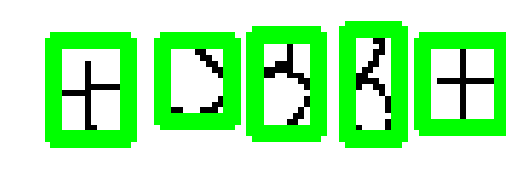

In [55]:
# Show the image with bounding boxes around detected digits
show_image_with_boxes(image_path, digit_boxes)

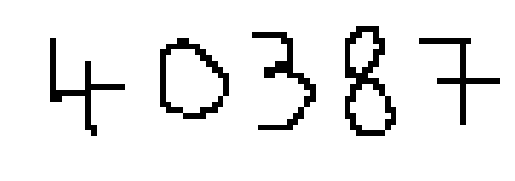

In [56]:
show_image(image_path)

In [58]:
from gtts import gTTS
import os 

In [61]:
def text_to_speech(text, language="en", filename="output.mp3"):
    # Create a gTTS object
    tts = gTTS(text=text, lang=language, slow=False)
    
    # Save the speech as an MP3 File
    tts.save(filename)
    
    # Play the generated speech
    os.system(f"Start {filename}")

In [62]:
# Make predictions for each digit
i=0
speech = "Predicted Numbers are: "
for box in digit_boxes:
    i=i+1
    x, y, w, h = box
    roi = img[y:y+h, x:x+w]
    roi_path = f'digit_roi_{i}.jpg'  # You may want to save each digit as a separate image
    cv2.imwrite(roi_path, roi)
    predict_label = predict_image(loaded_model, roi_path)
    speech += str(predict_label) + ", "
    print(f'The handwritten number in the ROI is predicted to be: {predict_label}')
text_to_speech(speech)


1/1 [==============================] - 0s 49ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 61ms/step
The handwritten number in the ROI is predicted to be: 0
1/1 [==============================] - 0s 48ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 50ms/step
The handwritten number in the ROI is predicted to be: 2
1/1 [==============================] - 0s 53ms/step
The handwritten number in the ROI is predicted to be: 2
